In [188]:
import plotly.graph_objects as go

import networkx as nx
import numpy as np
from pyvis.network import Network
from nltk.tokenize import sent_tokenize

In [189]:
THERS=0.5
def cosine_similarity(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

def sent_score(a,b):
    """
    implementation of sent score mentioned in the paper
    """
    words_a=a.split(' ')
    words_b=b.split(' ')
    # overlapping unigrams found in both sentences
    count=0
    for i in words_a:
        if i in words_b:
            count+=1

    score=count/(np.log(len(words_a))*np.log(len(words_b)))

    return score

def create_graph(article_text):
    sent_tokens=sent_tokenize(article_text)
    total_sents=len(sent_tokens)
    similarity_mat=np.zeros((total_sents,total_sents))
    for i in range(total_sents):
        for j in range(total_sents):
            # this way diag entries will be zeros
            if i!=j:
                foo_=sent_score(sent_tokens[i],sent_tokens[j])
                if foo_<THERS:
                    similarity_mat[i][j]=0
                else:
                    similarity_mat[i][j]=round(foo_,3)
    
    # create graph from similarity matrix
    network_graph=nx.from_numpy_array(similarity_mat)
    return network_graph


In [190]:
test_text='''
The National Cricket Academy is organising a camp in Bengaluru to help players from the north eastern states and those in the plate group upgrade their skill-sets under the tutelage of renowned coaches including Ashes winning bowling coach Troy Cooley. Close to 150 cricketers from the region are taking part in the camp and they will also get to interact with NCA head and India great VVS Laxman.The BCCI wants to ensure that players from Mizoram, Manipur, Meghalaya, Arunachal Pradesh, Sikkim get the best coaching and infrastructural facilities to be on par with the best domestic teams.
"This initiative by BCCI will give young and budding talents equal opportunity to hone their skills and represent India across formats. NE has enormous potential in sports and the board will keep no stone unturned to ensure that we are able to tap the best talent for the country," BCCI secretary Jay Shah tweeted.The fast bowlers are being trained by one of the world's acclaimed pace bowling coach Cooley while batters are working under the guidance of U-19 World Cup winning coach Hrishikesh Kanitkar.The spinners are under former India leg-spinner Sairaj Bahutule.
While BCCI hasn't provided any details about the duration of the camp, it is understood that the NCA has lined up a number of coaching programmes including U-19 Zonal Cricket Academy camps which will be held across various cities including Surat, Vijaywada to name a few.
Americans eat more ice cream than anyone else in the world-about 35 pints per person per year. From classic vanilla to green tea to salted caramel, the flavors are endless. But flavor isn’t this frozen dessert’s only attraction. Texture provides most of the sensual appeal of ice cream, and it’s maddeningly ephemeral: firm on the spoon yet creamy in the mouth as it melts. Understanding how to achieve this delicious juxtaposition is the key to making high-quality ice cream at home.
Sun-kissed beaches, crystal clear water, shimmering sand, cool breeze and scrumptious seafood define beach holidays, the best. Beach destinations guarantee a fun-packed vacation. If you’re an adventure enthusiast, you can indulge in watersports like scuba diving, snorkelling, sea walking and surfing. Treat your eyes to the exotic marine life which includes Clownfish, Mandarinfish, Mimic Octopus, Manta Rays, turtles and many more. Honeymooners can enjoy a romantic candle-light dinner, pamper themselves with a spa therapy and soak in the breathtaking sight of the sunset. Foodies can tantalise their palate with delectable prawns, crabs, lobsters and oysters. Photographers can try their hand at underwater photography and elevate their creative skills. If you’re planing on a relaxing vacation, beach destinations are perfect for you. Let your guard down, read a novel whilst resting in the hammock and rejuvenate your senses by booking a luxurious accommodation. Nature lovers can find inspiration in the splendid beauty of the beaches and changing hues of the sky. Solo travellers are bound to find solitude and experience spiritual bliss.'''

In [191]:
sents=sent_tokenize(test_text)

In [192]:
G=create_graph(test_text)

In [193]:
ranks=nx.pagerank(G,0.85)

In [194]:
ranks

{0: 0.08168360326309558,
 1: 0.1617803729750603,
 2: 0.026250540125688428,
 3: 0.1314536705511288,
 4: 0.044801032692792016,
 5: 0.01611508414622345,
 6: 0.033016308670089325,
 7: 0.00852272727272731,
 8: 0.07008912009408326,
 9: 0.025266295731049465,
 10: 0.01663182459398788,
 11: 0.00852272727272731,
 12: 0.00852272727272731,
 13: 0.028646610342562828,
 14: 0.07182834206503241,
 15: 0.056818181818181816,
 16: 0.056818181818181816,
 17: 0.00852272727272731,
 18: 0.054007904573863764,
 19: 0.06239609193979665,
 20: 0.028305925508273135}

In [195]:
print(G)

Graph with 21 nodes and 38 edges


In [196]:
net=Network(notebook=True)
net.from_nx(G)

In [197]:
net.show('graph-demo.html')

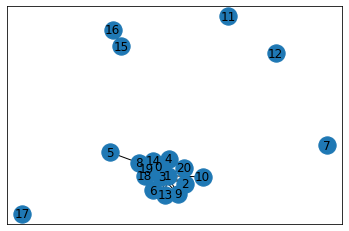

In [198]:
nx.draw_networkx(G)